All imports.

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np

Utility code.

In [140]:
#---TODO: add your functions that you'll use in the notebook repeatedly, if any
  
def degree_summary_and_distribution(G: nx.Graph):
    # Degree of a Node: The number of edges connected to a node.
    # Interpretation: A node's degree represents how many friends a person has on facebook.

    #  - the lowest number of friends
    #  - the highest number of friends
    #  - the average number of friends
    degrees = [d for _, d in G.degree()]
    min_degree = np.min(degrees)
    max_degree = np.max(degrees)
    avg_degree = np.mean(degrees)

    print(f"Min Degree: {min_degree}")
    print(f"Max Degree: {max_degree}")
    print(f"Average Degree: {avg_degree}")

    # plot the degree distribution
    degrees = [d for n, d in G.degree()]
    plt.figure()
    plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black', linewidth=0.2)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()


def connectivity(G: nx.Graph):
    is_connected = nx.is_connected(G)
    if not is_connected:
        # Connected Component: A group of nodes that are connected by paths.
        # The connected components can indicate if the network is one big cluster or composed of small ones.
        # Interpretation: Groups of friends isolated or interconnected.
        connected_components = list(nx.connected_components(G))
        num_connected_components = len(connected_components)
        largest_component_size = max(len(c) for c in connected_components)
        largest_cc = G.subgraph(max(connected_components, key=len))

    else:
        largest_component_size = len(G)
        largest_cc = G
        num_connected_components = 1

    print(f"The graph is connected: {is_connected}.")
    print(f"Number of Connected Components: {num_connected_components}.")
    print(f"Largest Component Size: {largest_component_size}.")

    # Diameter: the largest distance between any pair of nodes in the network.
    # Interpretation: the longest "friendship chain" connecting two users.
    diameter = nx.diameter(largest_cc) if nx.is_connected(largest_cc) else None
    
    print(f"Diameter: {diameter}")


def clustering_coefficient_and_distribution_plot(G: nx.Graph):
    # Clustering Coefficient: Measures how tightly connected a node’s neighbors are (how likely it is for 2 nodes with a common neighbor to be linked).
    # Interpretation: How interconnected are on average the users. High clustering means high interaction between the friends of an user.
    avg_clustering = nx.average_clustering(G)
    
    print(f"Average Clustering Coefficient: {avg_clustering}")

    # Edge density: fraction of actual edges compared to the maximum possible edges.
    # Used to determine if the clustering coefficient is high or not.
    # NOTE: A low density means the network is sparse.
    edge_density = nx.density(G)

    print(f"Edge Density: {edge_density}")
    print(f"Clustering Coefficient is {"high" if avg_clustering > edge_density else "low"} compared to the edge density.")

    # plot the custering coefficient distribution
    clustering_coeffs = list(nx.clustering(G).values())
    plt.figure()
    plt.hist(clustering_coeffs, bins="auto", edgecolor='black', linewidth=0.2)
    plt.title("Clustering Coefficient Distribution")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.show()


def betweenness_centrality_distribution(G: nx.Graph):
    # Betweenness Centrality: measures how often a node appears on shortest paths between other nodes.
    # Interpretation: People with high betweeness are the connection between two separate groups. They transfer information between the groups.
    
    betweenness = list(nx.betweenness_centrality(G).values())

    avg_betweenness = np.mean(betweenness)
    max_betweenness = np.max(betweenness)

    print(f"Average Betweenness Centrality: {avg_betweenness}")
    print(f"Max Betweenness Centrality: {max_betweenness}")


    # Plot distribution
    plt.figure()
    plt.hist(betweenness, bins="auto", edgecolor="black", linewidth=0.2)
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    # to diminish the big spikes in the plot 
    plt.yscale("log")
    plt.show()


def shortest_path_length_and_plot(largest_cc: nx.Graph):
    # Shortest path: minimum number of edges required to travel from one node to another.
    # Interpretation: The degree of separation between two users measured in friendships. 
    # NOTE: compare with no. nodes? 
    
    avg_shortest_path_length = nx.average_shortest_path_length(largest_cc)

    print(f"Average Shortest Path Length: {avg_shortest_path_length}")

# First Network - Original

### Network description

### Network Creation

### Network Properties

#### Connectivity

In [141]:
#TODO: move this to creation
matrix = scipy.io.mmread("networks\\socfb-Reed98.mtx")

# convert the matrix to a NetworkX graph
G = nx.from_scipy_sparse_array(matrix)
#---------

connectivity(G)

The graph is connected: True.
Number of Connected Components: 1.
Largest Component Size: 962.
Diameter: 6


#### Degree distribution

Min Degree: 1
Max Degree: 313
Average Degree: 39.11018711018711


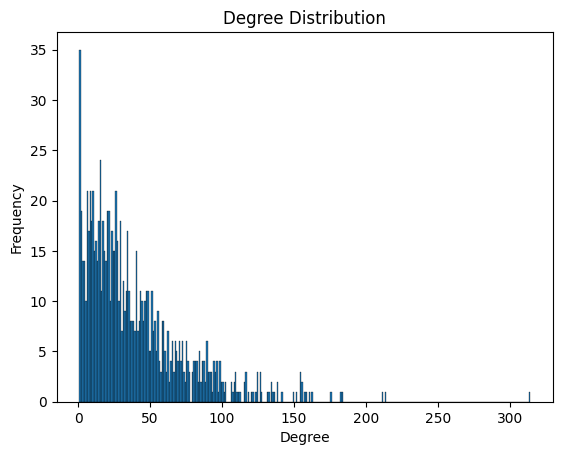

In [142]:
degree_summary_and_distribution(G)

#### Betweeness Centrality Distribution

Average Betweenness Centrality: 0.0015223547709239695
Max Betweenness Centrality: 0.09098269628720329


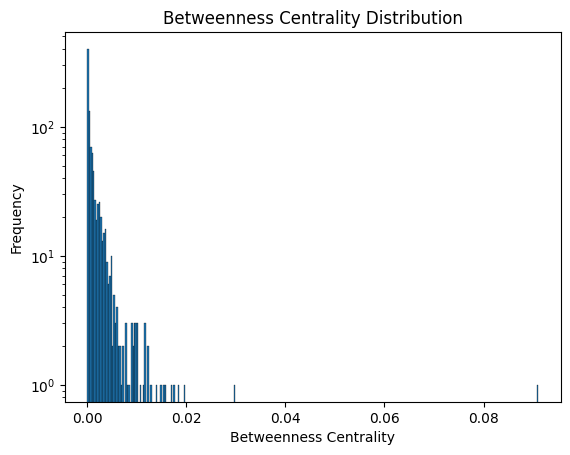

In [143]:
betweenness_centrality_distribution(G)

#### Clustering Coefficient

Average Clustering Coefficient: 0.31836022727227925
Edge Density: 0.04069738513026754
Clustering Coefficient is high compared to the edge density.


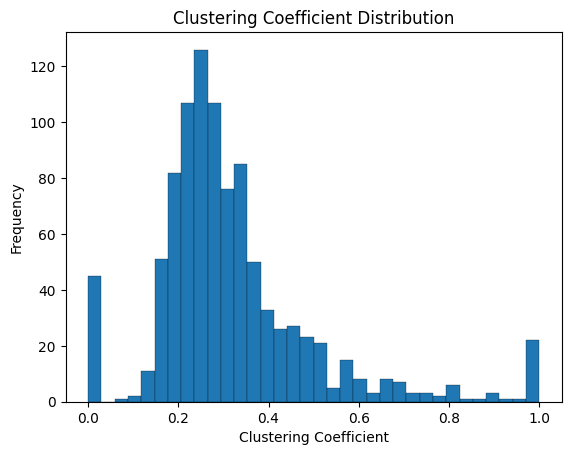

In [144]:
clustering_coefficient_and_distribution_plot(G)

#### Average Shortest Path

In [145]:
shortest_path_length_and_plot(G)

Average Shortest Path Length: 2.461460580087011


### Vizualization

### Important Nodes